<a href="https://colab.research.google.com/github/goodbyeskyharbor/PHYS308-notebook-solutions/blob/main/PHYS308_Project_01_Global_Temperature_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Planet Earth's Global Temperature


In this project we will download temperature data from NASA’s Goddard Institute for Space Studies (**GISS**) and analyze it using **pandas** and **seaborn**.

Include your name below:

Joe Hudec


### Introduction

First, we must understand the data collection method. This method was originally documented by Hansen and Lebedeff in [1987](https://pubs.giss.nasa.gov/docs/1987/1987_Hansen_ha00700d.pdf) and the study has been repeated many times including in [2010](https://pubs.giss.nasa.gov/docs/2010/2010_Hansen_ha00510u.pdf). A summary of the data collection method is as follows:
1. Thousands of meteorological stations around the world (land and sea) measure the surface temperature. All measurements discussed here will be in Celsius.
1. The world average temperature throughout every month for all stations is calculated. Systematic effects are corrected and uncertainty is estimated.
1. The world average temperature every month for all meteorological stations during the three decade period 1951-1980 is defined to be the "reference monthly average temperature"
1. The **temperature anomaly** is defined:
   * "temperature anomaly" = "world monthly average temperature" - "reference monthly average temperature"

### Accessing the data

The GISS data can be found here: https://data.giss.nasa.gov/gistemp/

From this link please find and download the CSV file
"Global-mean monthly, seasonal, and annual means, 1880-present, updated through most recent month". The file name is GLB.Ts+dSST.csv.

Use pandas `read_csv()` with the option `skiprows=1` to read in the data and setup a dataframe.

### Data analysis Instructions

1. Data inspection - Take a look at the dataframe you have created using `df.tail()` where df is the name I have given to my dataframe.
    * You should see a "Year" column and a column for every month ("Jan", "Feb", etc.).
        * There are also columns for averages:
            * "J-D" = 1 year average temperature (January -> December)
            * "D-N" = 1 year average temperature (December -> November)
            * "DJF" = 3 month average temperature (Dec, Jan, Feb)
            * "MAM" = 3 month average temperature (Mar, Apr, May)
            * "JJA" = 3 month average temperature (Jun, Jul, Aug)
            * "SON" = 3 month average temperature (Sep, Oct, Nov)<br><br>
            
2. Setup - Set the "Year" column as the dataframe index<br><br>

3. Data cleaning - Note that the  data is very recent and there is typically data missing for September->December of the current year. The missing data appears as three stars ("`***`"). We need to clean this up by replacing the stars with something that pandas understands: "NaN" = Not a Number. Also we should make sure that all datapoints are floats and not strings. We can accomplish this using the following lines (where df is the name I have given to the dataframe):
```python
df = df.replace("***", "NaN")
df = df.astype(float)
```
<br><br>

4. Make a new dataframe "df_drop" containing only the month data (dropping the averages 'J-D','D-N','DJF','MAM','JJA', and 'SON' using the pandas function `drop()`).<br><br>

5. Now we are ready to make plots using your dataframe df_drop. We do so in each of the following questions.<br><br>

6. Make a plot of the January Temperature Anomaly (column "Jan"). The plot should contain the temperature anomaly in degrees celsius on the y-axis and the year on the x-axis. Basically you are plotting the data contained in one column of the dataframe vs the index of the dataframe (the year). Please label your axes and include temperature units. Note, you can make bigger plots and label the axes using the following syntax (example from a previous notebook):

      ```python
      fig, ax = plt.subplots(1, 1, figsize=(12, 8))
      df_pop3.loc["United Kingdom"].NumericPopulation.plot(ax=ax,kind='bar')
      ax.set_ylabel("Population")
      ```

7. Repeat the same plot but with option `kind='bar'`<br><br>

8. Make a new column in your new dataframe with column name "Yearly Avg" containing the 12-month average temperature for the year and plot this column ("Yearly Average Temperature Anomaly" vs "Year"). Calculate this average on your own (instead of relying on the "J-D" column which we just dropped). To do this you can use the pandas [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) function . My recommendation: Read the documentation linked above so that you can choose the option of taking the mean of a dataframe row instead of a column (option="axis").<br><br>

9. Again plot "Temperature Anomaly" Vs "Year", this time as a line graph. Plot the temperature anomaly for all 12 months and for the yearly average. You should have a total of 13 lines drawn. Draw the yearly average line with a larger line width and with color black in order to make it stand out. Please label your axes and draw a legend.<br><br>

10. This time we want to plot "Temperature Anomaly" Vs "Month". We will do this for every every year (so there will be hundreds of lines drawn). The easiest way to do this is to use the transpose() function to convert the dataframe indices to columns and the columns to indices. I also recommend setting the color palette using plot() option `cmap="BuPu"`. This will ensure that one can tell the old years from the more recent years. You may also want to draw the legend off to the side of the plot using the following syntax
          
      ```python
      plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
      ```

    <br><br>
11. Use seaborn to plot the dataframe as a heatmap. The y-axis should be the month and the x-axis should be the year. The z-axis (the color of the heatmap) should represent the temperature anomaly. Again the easiest way to make the y-axis the month is to use the transpose() function on the dataframe. Choose a different color palette which you think will be a good way of representing the data https://matplotlib.org/examples/color/colormaps_reference.html<br><br>
    

12. Compute a 10-year rolling average and plot it on the same graph as the yearly average. Hint: Lookup the pandas function rolling().

13. Fit a linear function to the data from 1970 to the present. Plot the "Yearly Avg" data along with this best-fit line. Display the fit parameters on the plot.
    
14. Fit a quadratic function to the data from 1970 to the present. Plot the "Yearly Avg" data along with this best-fit line. Display the fit parameters on the plot.    
    
### Code:

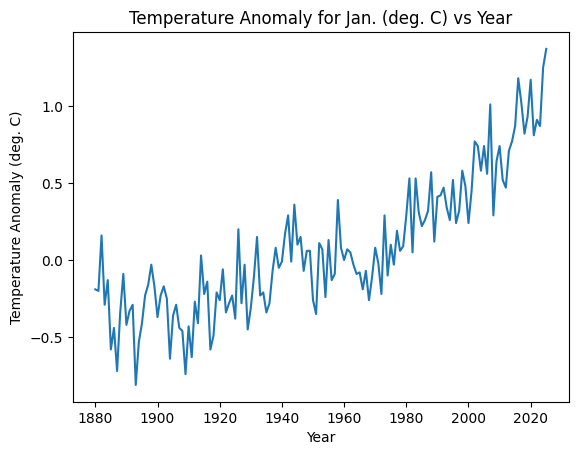

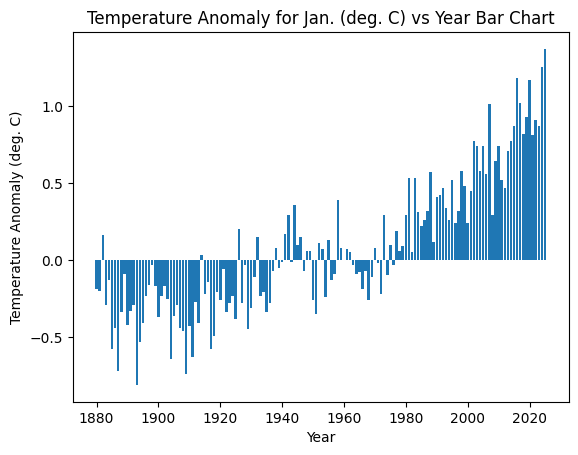

'-------------------------------- Plot 4 ---------------------------------'

<Figure size 640x480 with 0 Axes>

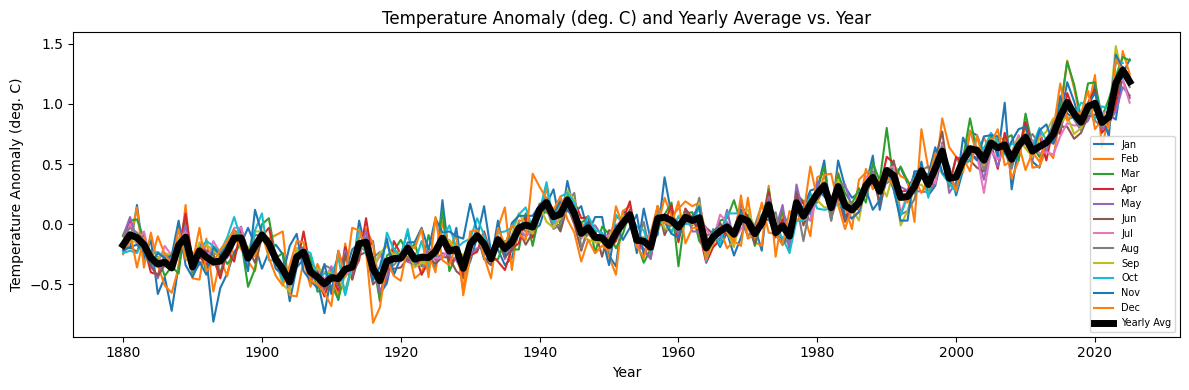

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#  sometimes necessary for plotting with Jupyter+pandas+pyplot
%matplotlib inline

url = 'https://raw.githubusercontent.com/goodbyeskyharbor/PHYS308-notebook-solutions/refs/heads/main/GLB.Ts%2BdSST.csv'
temp_data = pd.read_csv(url, skiprows=1, low_memory=False)
temp_df = pd.DataFrame(temp_data)
temp_df = temp_df.set_index('Year')
temp_df = temp_df.replace("***", "NaN")
temp_df = temp_df.astype(float)

#print(temp_df.tail(5))

df_drop = temp_df.drop(columns=['J-D','D-N','DJF','MAM','JJA','SON'])

#print(df_drop.tail(5))

"""-------------------------------- Plot 1 ---------------------------------"""

plt.figure(1)

x_axis = df_drop.index
y_axis_1 = df_drop['Jan']

plt.plot(x_axis, y_axis_1)

plt.title("Temperature Anomaly for Jan. (deg. C) vs Year")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (deg. C)")

"""-------------------------------- Plot 2 ---------------------------------"""

plt.figure(2)

plt.bar(x_axis, y_axis_1)

plt.title("Temperature Anomaly for Jan. (deg. C) vs Year Bar Chart")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (deg. C)")

plt.show()


"""-------------------------------- Plot 3 ---------------------------------"""

df_drop['Yearly Avg'] = df_drop.mean(axis=1)

plt.figure(3)

plot_3 = df_drop.plot(subplots=False, layout=(1, len(df_drop.columns)), figsize=(12, 4))

plt.title("Temperature Anomaly (deg. C) and Yearly Average vs. Year")
plt.ylabel("Temperature Anomaly (deg. C)")

avg_line = plot_3.get_lines()[12]
avg_line.set_linewidth(5)
avg_line.set_color('black')

plt.legend(loc="lower right", fontsize=7)

plt.tight_layout()

"""-------------------------------- Plot 4 ---------------------------------"""


In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}